In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from global_land_mask import globe
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

In [79]:
h = '/media/rakshith/Seagate Expansion Drive/mraks/TGMS ERA 1959-2021, India only.nc'
dsb = xr.open_dataset(h)

In [80]:
June = dsb.time.dt.month.isin(6)
September = dsb.time.dt.month.isin(9)

In [81]:
lon_grid, lat_grid = np.meshgrid(dsb.longitude, dsb.latitude)
mask = globe.is_land(lat_grid, lon_grid)

In [82]:
clim = dsb.sel(time=June)
bspat = clim.where(mask>0).mean(dim=['latitude', 'longitude'])

acQdivju = bspat.mtnswrf + bspat.mtnlwrf - bspat.msnlwrf - bspat.msnswrf - bspat.mslhf - bspat.msshf
acPEju = 86400*28.96*(bspat.mtpr + bspat.mer)

In [83]:
clim = dsb.sel(time=September)
bspat = clim.where(mask>0).mean(dim=['latitude', 'longitude'])

acQdivse = bspat.mtnswrf + bspat.mtnlwrf - bspat.msnlwrf - bspat.msnswrf - bspat.mslhf - bspat.msshf
acPEse = 86400*28.96*(bspat.mtpr + bspat.mer)

In [84]:
acTGMSju = acQdivju/acPEju
acTGMSse = acQdivse/acPEse

In [28]:
en = '/media/rakshith/Seagate Expansion Drive/mraks/Mass consistent data/India Total energy + Tendency/*.nc'
ds = xr.open_mfdataset(en)

In [29]:
june = ds.time.dt.month.isin(6)
september = ds.time.dt.month.isin(9)

In [30]:
spat = ds.where(mask>0).mean(dim=['latitude', 'longitude'])

In [43]:
timav = spat.sel(time=june)
Qdivju = timav.tediv + timav.tetend

In [44]:
timav = spat.sel(time=september)
Qdivse = timav.tediv + timav.tetend

In [93]:
ef = '/media/rakshith/Seagate Expansion Drive/mraks/Mass consistent data/India water vapor flux/*.nc'
ds1 = xr.open_mfdataset(ef)

In [94]:
vspat = ds1.where(mask>0).mean(dim=['latitude', 'longitude'])

In [106]:
vtimav = vspat.sel(time=june)
PEju = 86400*28.96*(vtimav.wvdiv + vtimav.wvtend)

In [107]:
vtimav = vspat.sel(time=september)
PEse = 86400*28.96*(vtimav.wvdiv + vtimav.wvtend)

In [112]:
TGMSju = np.divide(Qdivju, -PEju)
TGMSse = np.divide(Qdivse, -PEse)

In [113]:
X1 = np.arange(1979, 2022, 1)

In [140]:
k=10 #In your case
data1=np.mean(np.array(TGMSju[1:41]).reshape(-1, k), axis=1)
data2=np.mean(np.array(TGMSse[1:41]).reshape(-1, k), axis=1)

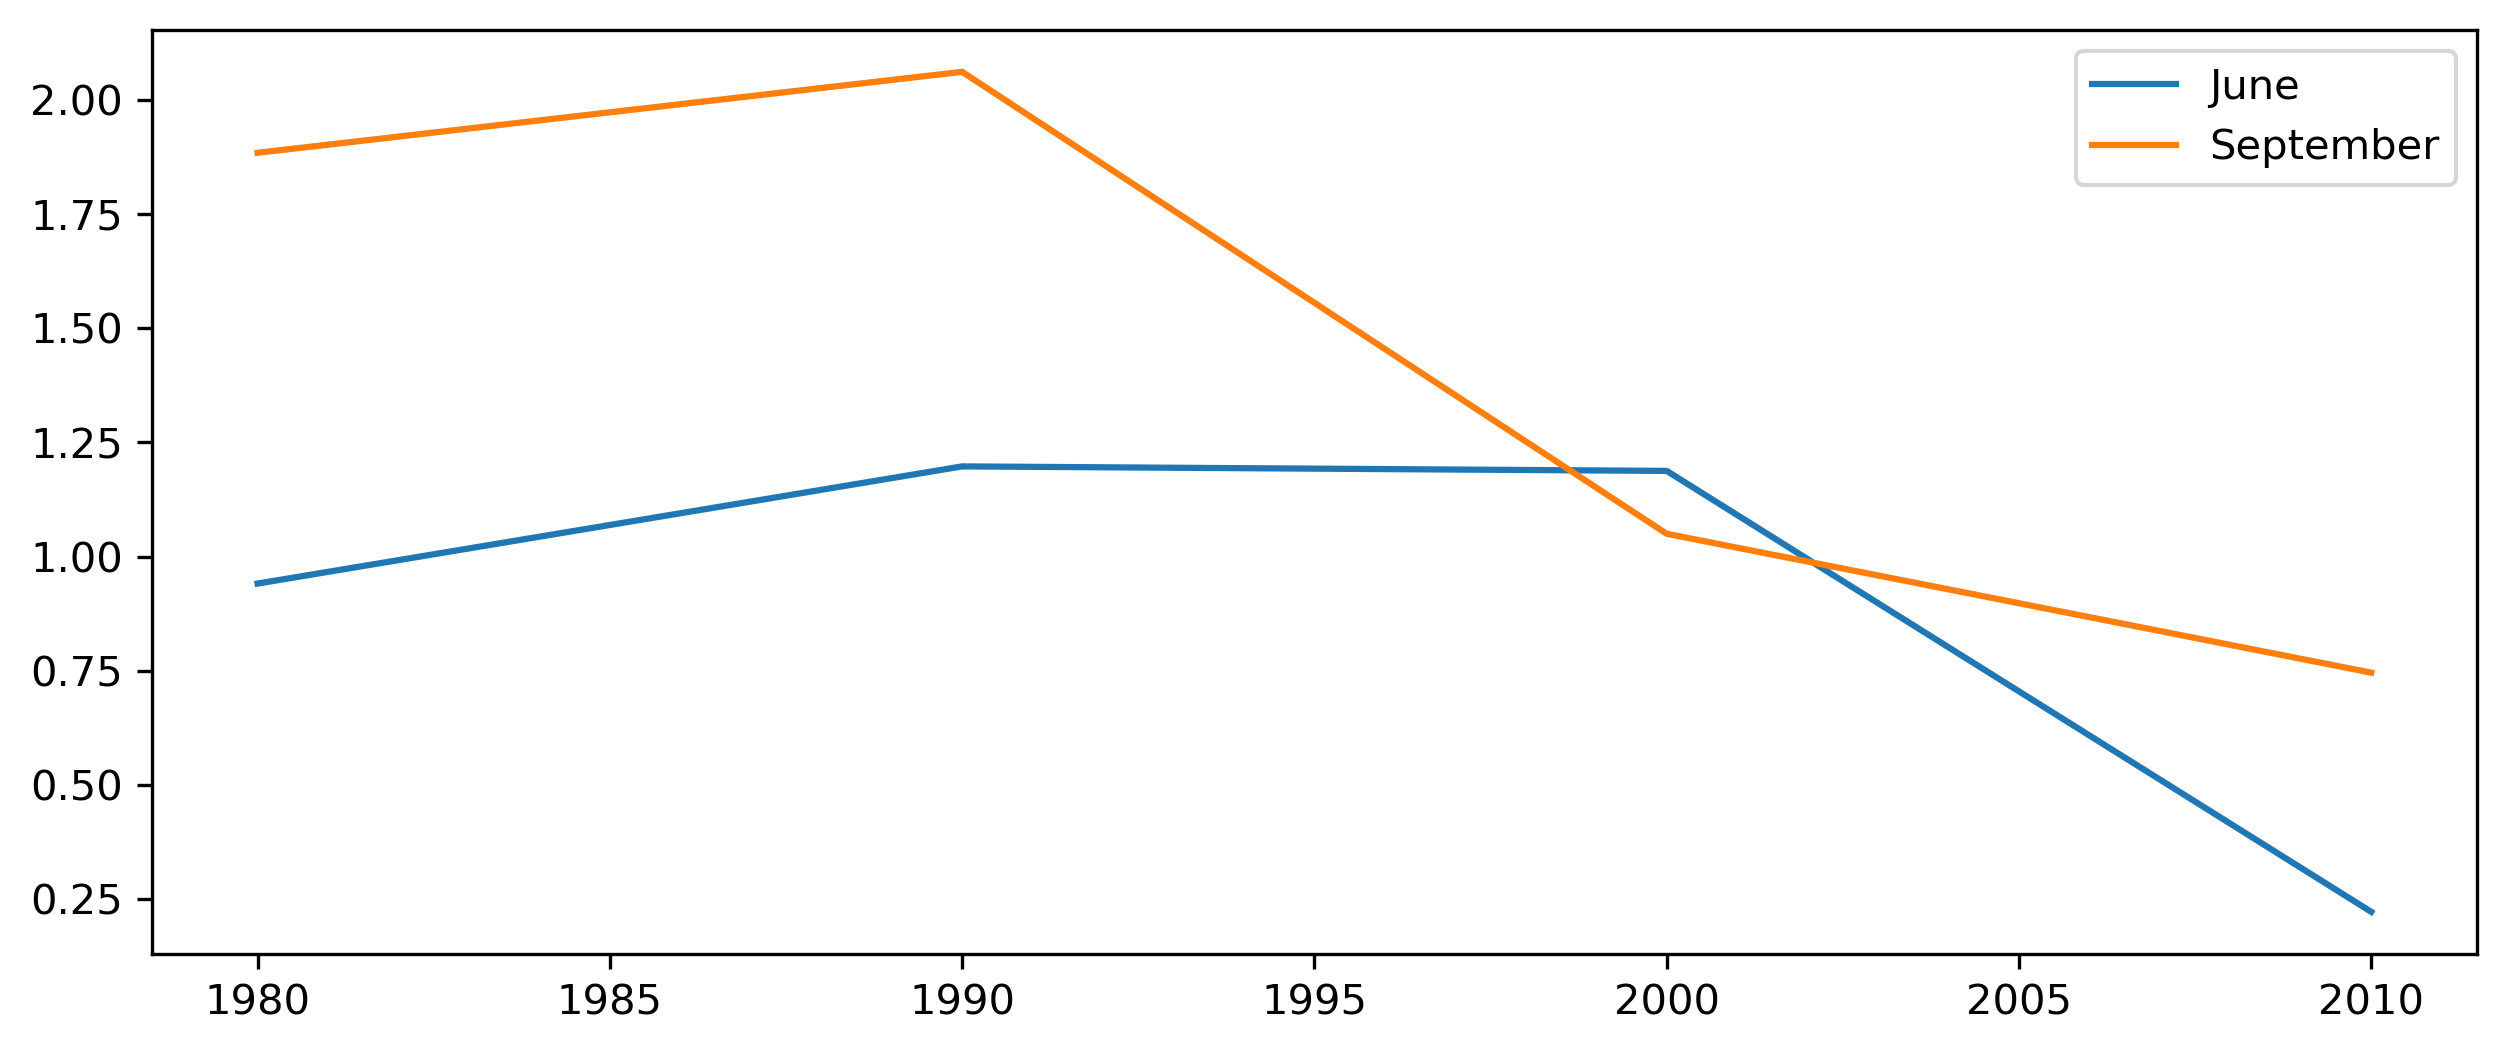

In [141]:
X2 = np.arange(1980, 2020, k)
plt.plot(X2, data1, label='June')
plt.plot(X2, data2, label='September')
plt.legend()

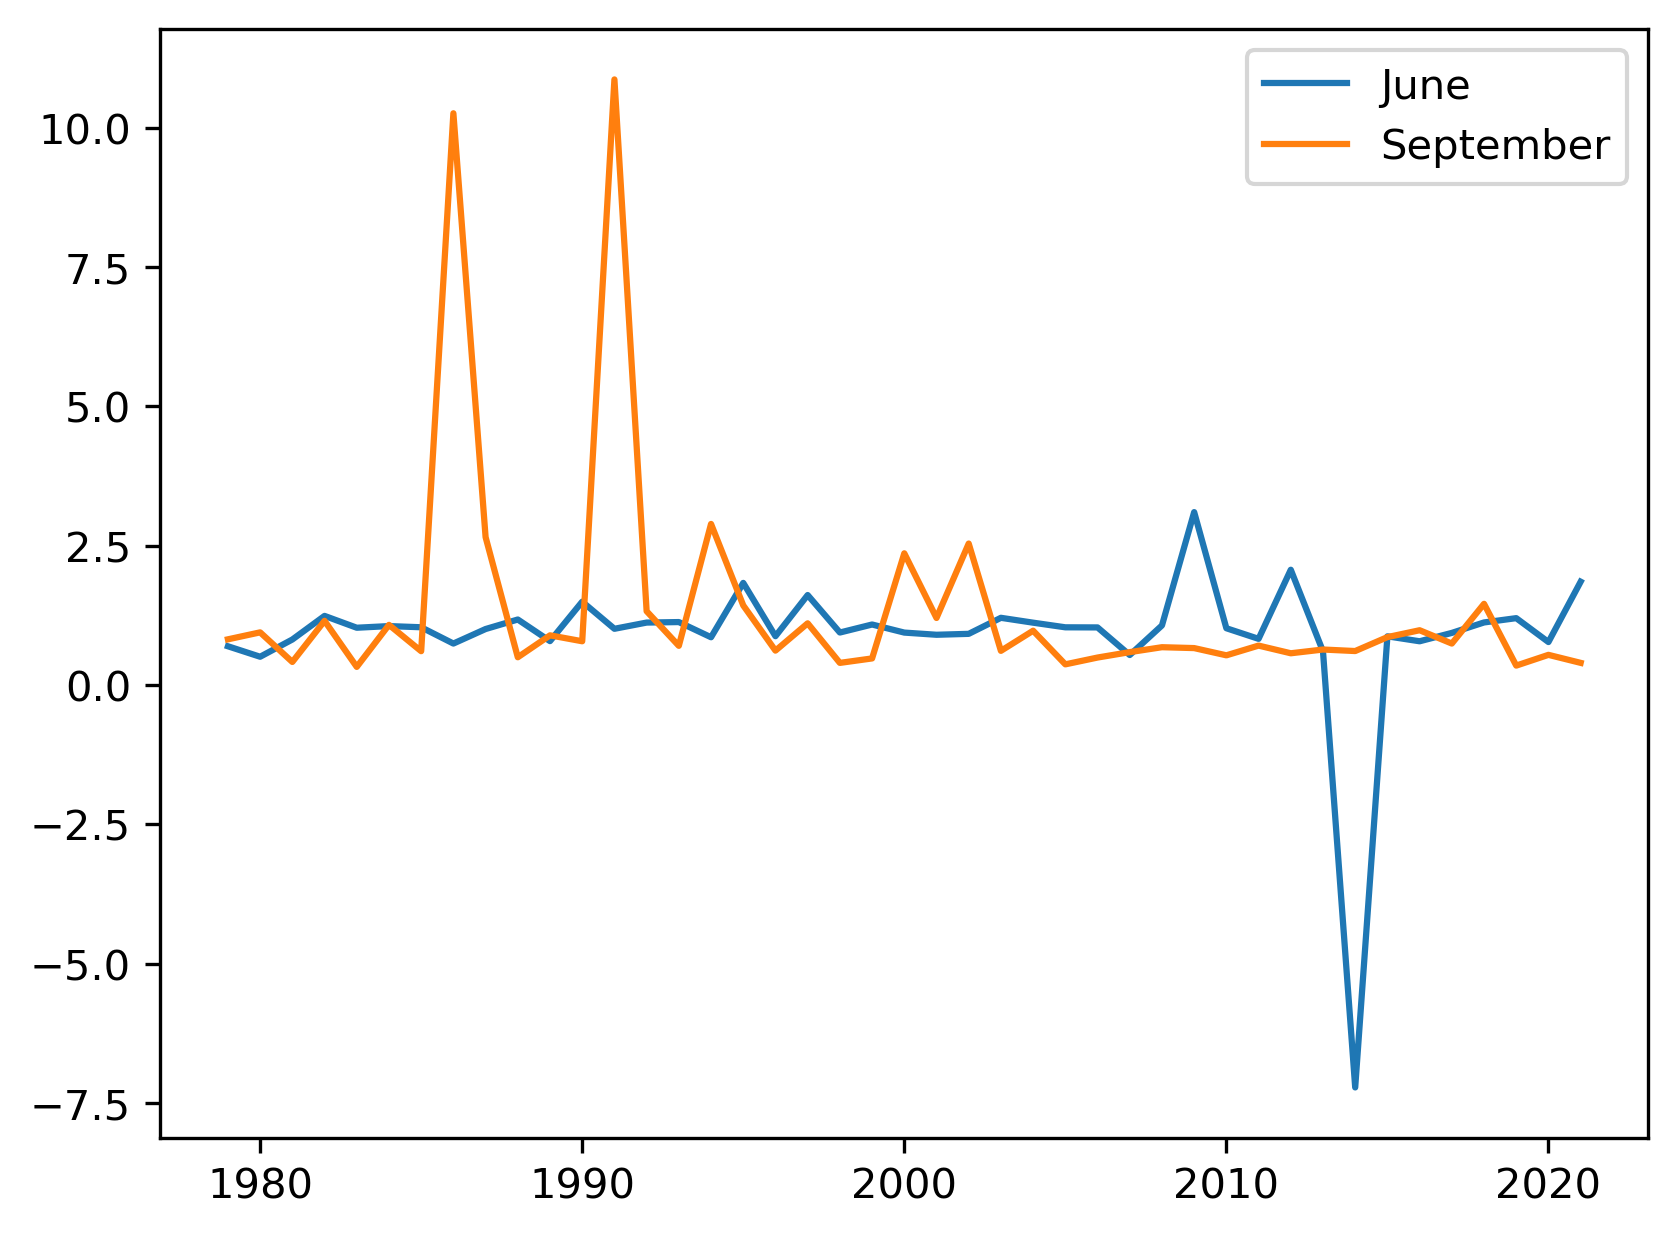

In [115]:
plt.plot(X1, TGMSju, label='une')
plt.plot(X1, TGMSse, label='September')
plt.legend()
plt.ylim(0,4)

In [77]:
X = np.arange(1959, 2022, 1)

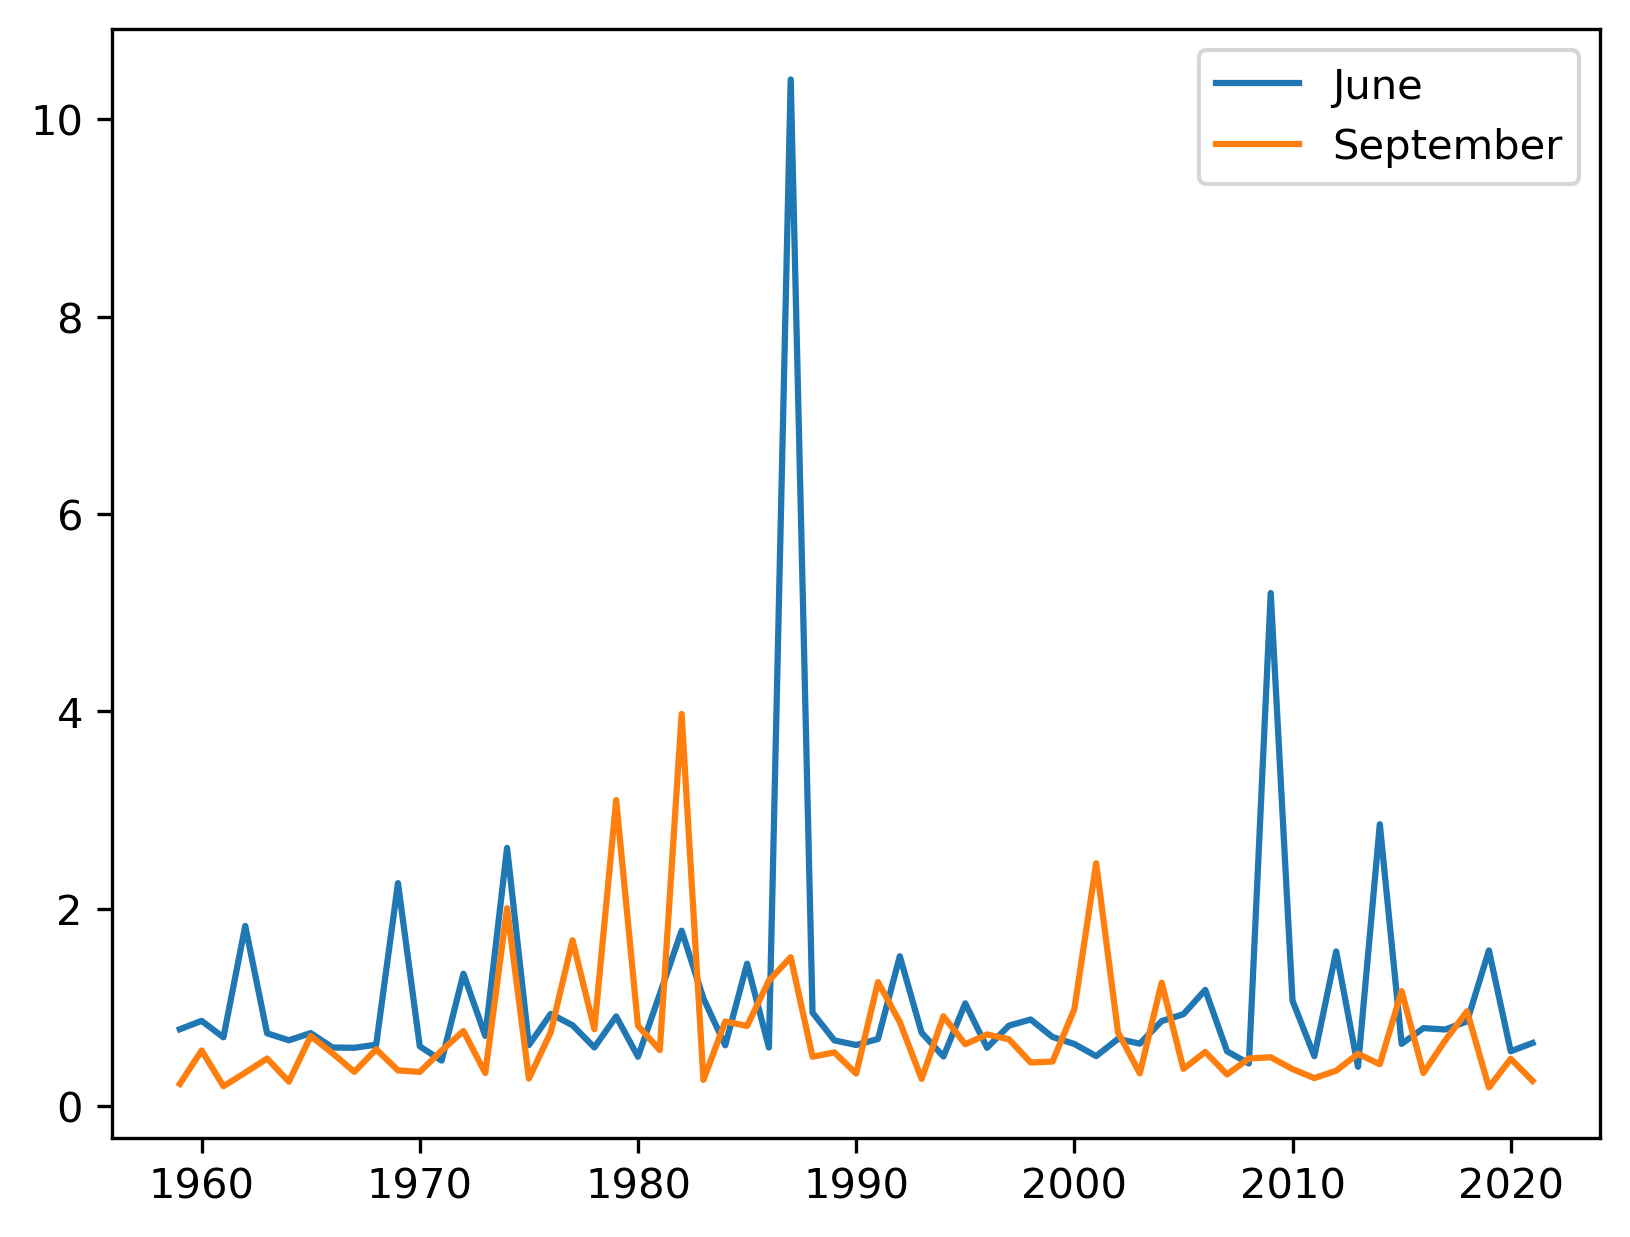

In [110]:
plt.plot(X, acTGMSju, label='June')
plt.plot(X, acTGMSse, label='September')
plt.legend()
#plt.ylim(0,4)

(0.0, 5.0)

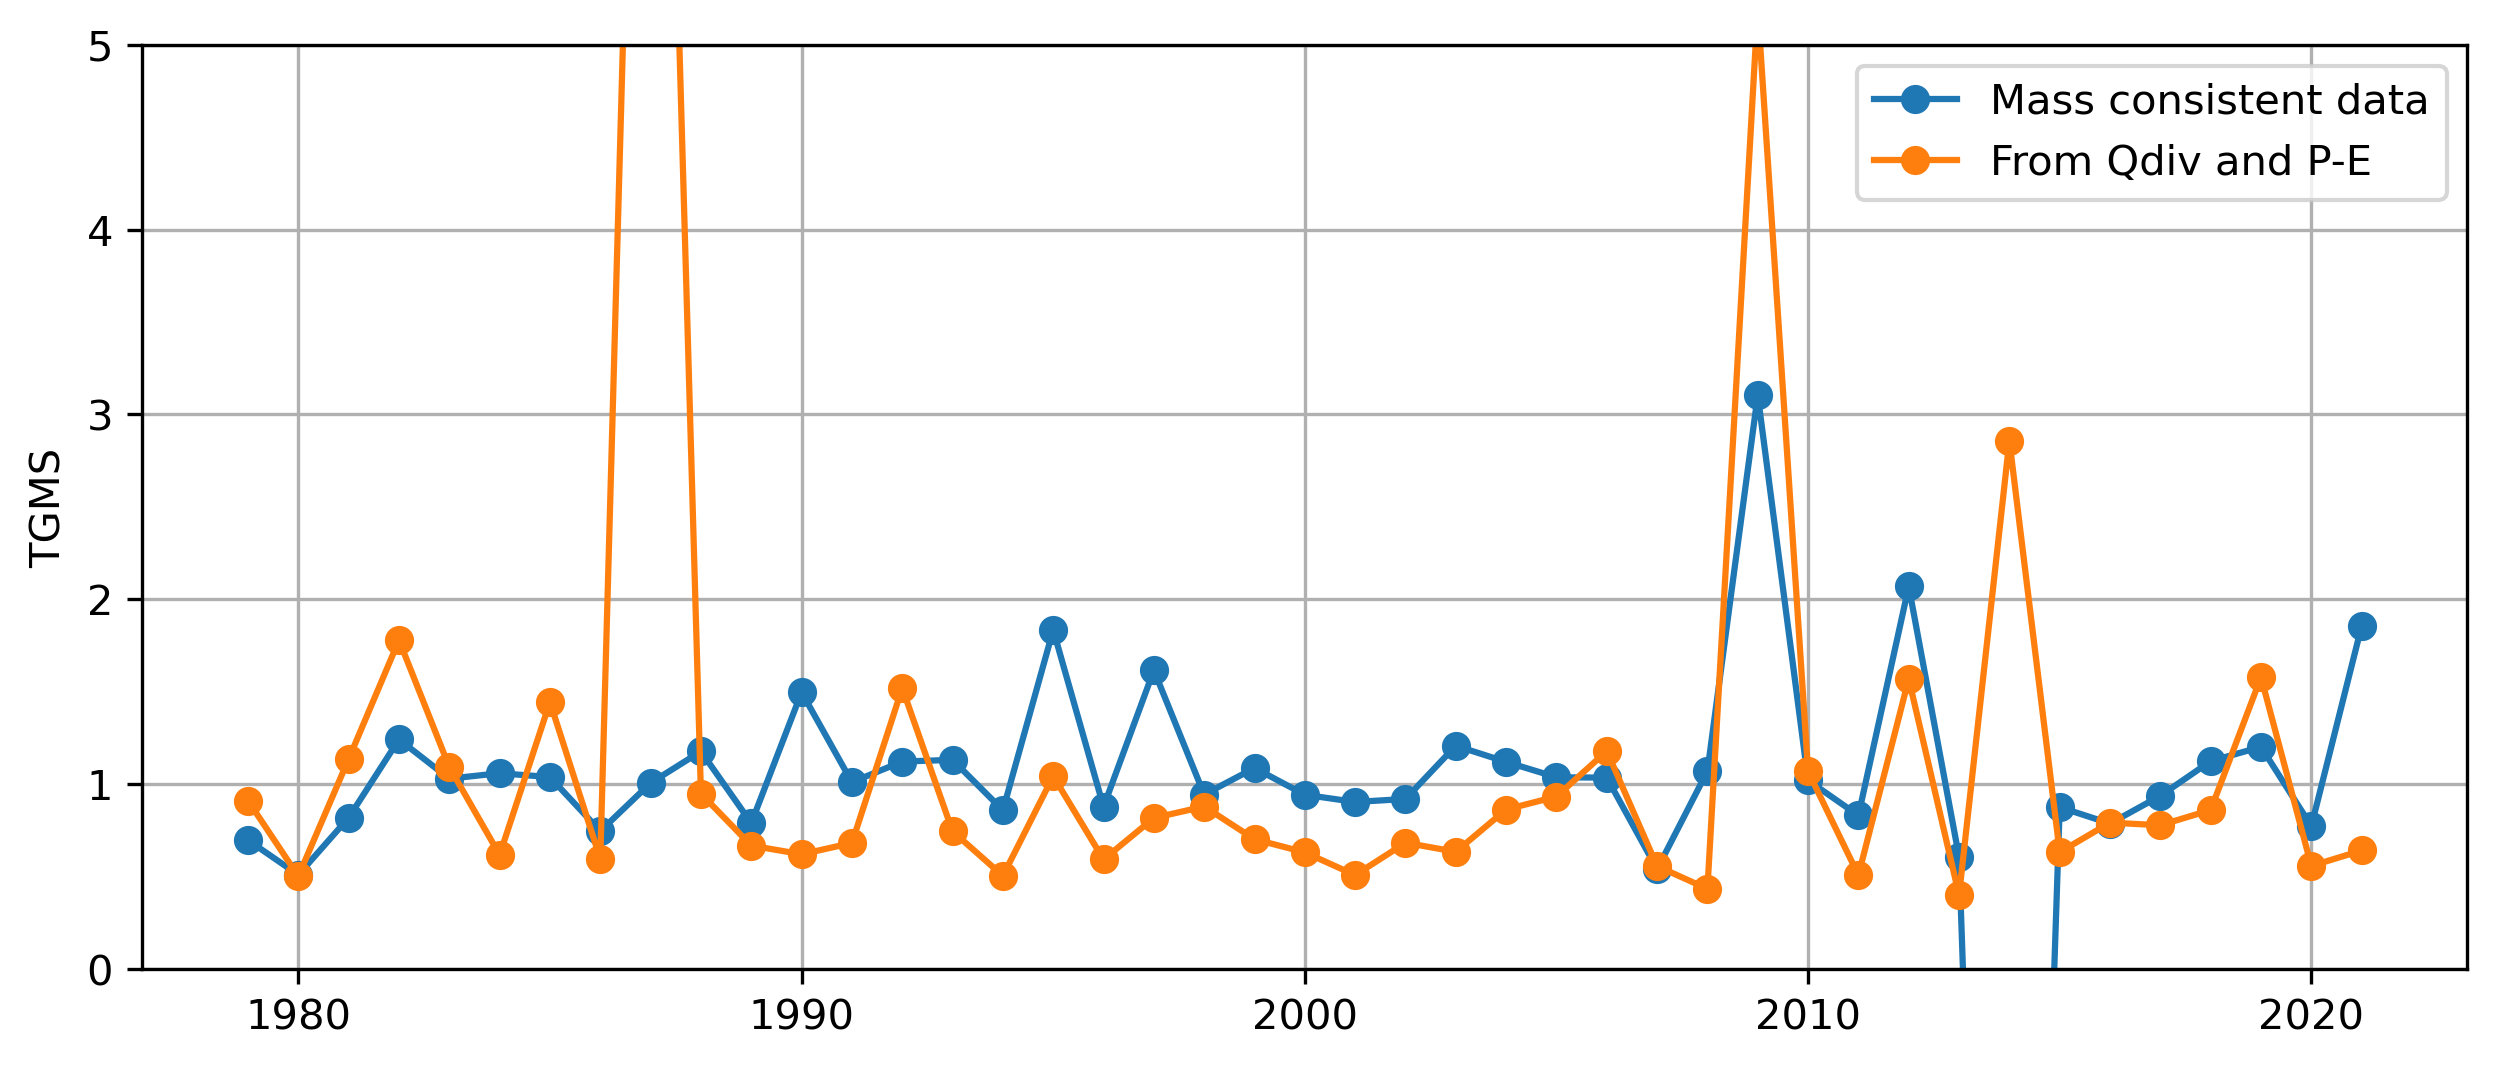

In [126]:
plt.rcParams['figure.figsize'] = [10, 4]
plt.plot(X1, TGMSju, label='Mass consistent data', marker='o')
plt.plot(X1, acTGMSju[20:], label='From Qdiv and P-E', marker='o')
plt.ylabel('TGMS')
plt.legend()
plt.grid()
plt.ylim(0,5)